# Predicting Outcomes of Myocardial Infarction (MI)

This dataset comes from the UCI Machine Learning Repository called the Myocardial infarction complications data set. My interest in this dataset originates from the research I performed in the first three years of my Ph.D at Duke University.  I studied cardiac tissue engineering where I differentiated human induced pluripotent stem cells into cardiomyocytes and embedded them into a hydrogel to form a contractile cardiac tissue that can be implanted on the epicardium to facilitate recovery from myocardial infarction.  As a result, I was curious if I could use my new skills in machine learning algorithms to analyze this dataset to predict whether a patient will die.  The dataset contains medical information from patients prior to hospital admission and during the first three days at the hospital.  My goal is to develop a ML algorithm using the 112 features to predict whether a patient will die.

In [897]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



In [898]:
address = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data'
df = pd.read_csv(address)
df.head()

,1,77,1.1,2,1.2,1.3,2.1,?,3,0,...,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90
0,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
2,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
3,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
4,6,64,1,0,1,2,1,?,0,0,...,0,0,0,0,0,0,0,0,0,0


The columns have bizarre names so I will change their names based on the information listed for each feature on the UCI Machine Learning Repository website.

In [899]:
col_names = pd.Series([
    'ID',
    'AGE',
    'SEX',
    'INF_ANAM',
    'STENOK_AN',
    'FK_STENOK',
    'IBS_POST',
    'IBS_NASL',
    'GB',
    'SIM_GIPERT',
    'DLIT_AG',
    'ZSN_A',
    'nr11',
    'nr01',
    'nr02',
    'nr03',
    'nr04',
    'nr07',
    'nr08',
    'np01',
    'np04',
    'np05',
    'np07',
    'np08',
    'np09',
    'np10',
    'endocr_01',
    'endocr_02',
    'endocr_03',
    'zab_leg_01',
    'zab_leg_02',
    'zab_leg_03',
    'zab_leg_04',
    'zab_leg_06',
    'S_AD_KBRIG',
    'D_AD_KBRIG',
    'S_AD_ORIT',
    'D_AD_ORIT',
    'O_L_POST',
    'K_SH_POST',
    'MP_TP_POST',
    'SVT_POST',
    'GT_POST',
    'FIB_G_POST',
    'ant_im',
    'lat_im',
    'inf_im',
    'post_im',
    'IM_PG_P',
    'ritm_ecg_p_01',
    'ritm_ecg_p_02',
    'ritm_ecg_p_04',
    'ritm_ecg_p_06',
    'ritm_ecg_p_07',
    'ritm_ecg_p_08',
    'n_r_ecg_p_01',
    'n_r_ecg_p_02',
    'n_r_ecg_p_03',
    'n_r_ecg_p_04',
    'n_r_ecg_p_05',
    'n_r_ecg_p_06',
    'n_r_ecg_p_08',
    'n_r_ecg_p_09',
    'n_r_ecg_p_10',
    'n_p_ecg_p_01',
    'n_p_ecg_p_03',
    'n_p_ecg_p_04',
    'n_p_ecg_p_05',
    'n_p_ecg_p_06',
    'n_p_ecg_p_07',
    'n_p_ecg_p_08',
    'n_p_ecg_p_09',
    'n_p_ecg_p_10',
    'n_p_ecg_p_11',
    'n_p_ecg_p_12',
    'fibr_ter_01',
    'fibr_ter_02',
    'fibr_ter_03',
    'fibr_ter_05',
    'fibr_ter_06',
    'fibr_ter_07',
    'fibr_ter_08',
    'GIPO_K',
    'K_BLOOD',
    'GIPER_Na',
    'Na_BLOOD',
    'ALT_BLOOD',
    'AST_BLOOD',
    'KFK_BLOOD',
    'L_BLOOD',
    'ROE',
    'TIME_B_S',
    'R_AB_1_n',
    'R_AB_2_n',
    'R_AB_3_n',
    'NA_KB',
    'NOT_NA_KB',
    'LID_KB',
    'NITR_S',
    'NA_R_1_n',
    'NA_R_2_n',
    'NA_R_3_n',
    'NOT_NA_1_n',
    'NOT_NA_2_n',
    'NOT_NA_3_n',
    'LID_S_n',
    'B_BLOK_S_n',
    'ANT_CA_S_n',
    'GEPAR_S_n',
    'ASP_S_n',
    'TIKL_S_n',
    'TRENT_S_n',
    'FIBR_PREDS',
    'PREDS_TAH',
    'JELUD_TAH',
    'FIBR_JELUD',
    'A_V_BLOK',
    'OTEK_LANC',
    'RAZRIV',
    'DRESSLER',
    'ZSN',
    'REC_IM',
    'P_IM_STEN',
    'LET_IS'
])

df.columns = col_names

# Data Cleaning

Based on looking at the first few rows of the data frame and the information provided on the UCI Machine Learning Repository website, all of the missing data is specified as '?' so I counted the number of times '?' appears in each feature.

In [900]:
df[df=='?'].count().sort_values(ascending=False)[:10]

KFK_BLOOD     1695
IBS_NASL      1627
S_AD_KBRIG    1075
D_AD_KBRIG    1075
NOT_NA_KB      685
LID_KB         676
NA_KB          656
Na_BLOOD       375
GIPER_Na       375
K_BLOOD        371
dtype: int64

KFK_BLOOD, IBS_NASL, S_AD_KBRIG, D_AD_KBRIG, NOT_NA_KB, LID_KB, and NA_KB are missing signficant data so I will drop these features.

In [901]:
MI_df = df.drop(columns=['KFK_BLOOD','IBS_NASL','S_AD_KBRIG','D_AD_KBRIG',
                        'NOT_NA_KB','LID_KB','NA_KB'], axis=1)

Convert all data types to floats to be able to calculate statistics, such as mean, median, etc.

In [902]:
MI_df = MI_df.replace(to_replace='?',value=np.nan)
MI_df = MI_df.astype('float32')

One method to fix missing values is to impute the value based on the rest of the data. To start, I will identify features where the most common value occurs over 75% of the time.  In this case, I will guess that missing values in these columns are the value that occurs over 75% of the time.

In [903]:
# identify which columns have missing values
Cols_missing = MI_df.isnull().sum().sort_values(ascending=False)
Cols_missing = Cols_missing[Cols_missing != 0]

Col_common = []
Col_common_max_value = []
for i in range(len(Cols_missing)):
    if max(MI_df[Cols_missing.index[i]].value_counts())/MI_df[Cols_missing.index[i]].value_counts().sum()>0.75:
        Col_common.append(Cols_missing.index[i])
        Col_common_max_value.append(max(MI_df[Cols_missing.index[i]])) 

# replace nan with most common value if that value occurs more than 75% of the time
for i in range(len(Col_common)):
    MI_df[Col_common[i]].replace(np.nan,Col_common_max_value[i],inplace=True)

In [904]:
# Identify which columns still have missing values
Cols_missing = MI_df.isnull().sum().sort_values(ascending=False)
Cols_missing = Cols_missing[Cols_missing != 0]
Cols_missing

Na_BLOOD         375
K_BLOOD          371
GIPO_K           369
AST_BLOOD        284
ALT_BLOOD        283
S_AD_ORIT        267
D_AD_ORIT        267
DLIT_AG          248
ROE              203
ritm_ecg_p_01    152
TIME_B_S         126
L_BLOOD          125
STENOK_AN        106
ant_im            83
inf_im            80
lat_im            80
FK_STENOK         73
IBS_POST          51
ASP_S_n           17
GEPAR_S_n         17
ANT_CA_S_n        13
NOT_NA_1_n        10
LID_S_n           10
GB                 9
AGE                8
NA_R_1_n           5
INF_ANAM           4
dtype: int64

For colums with numeric data, I will impute missing values as the median of the feature.  To do this, I will determine which columns are numeric vs. categorical based on the number of unique values in each column.

In [905]:
# separate columns with missing data into numeric vs. categorical
Cols_num_missing = []
Cols_cat_missing = []
for i in range(len(Cols_missing)):
    if len(MI_df[Cols_missing.index[i]].unique()) > 10:
        Cols_num_missing.append(Cols_missing.index[i])
    else:
        Cols_cat_missing.append(Cols_missing.index[i])

In [906]:
# create a function that replaces missing values in columns with numeric data with the median of the available data
def use_numeric_average(columns):
    for i in range(len(columns)):
        median = MI_df[columns[i]].median()
        MI_df[columns[i]].replace(np.nan,median,inplace=True)

# Try replacing missing values of numeric data with median of available data
use_numeric_average(Cols_num_missing)

I still need to determine a solution for missing values in the columns containing categorical data. According to the UCI Machine Learning Repository website for this dataset, ritm_ecg_p_01, ritm_ecg_p_07, and ritm_ecg_p_08 are mutually exclusive, i.e. all of these values represent ECG at the time of admission with varying heart rates. ritm_ecg_p_01 has a heart rate of 60-90 bpm. ritm_ecg_p_07 has a heart rate greater than 90 bpm while ritm_ecg_p_08 has a heart rate lower than 60 bpm.  Since I have all of the data for ritm_ecg_p_07 and ritm_ecg_p_08, I can use those columns to determine values for ritm_ecg_p_01.

In [907]:
# Estimate ritm_ecg_p_01 based on ritm_ecg_p_07 and ritm_ecg_p_08 
# ritm_ecg_p_01 must be 0 if either ritm_ecg_p_07 or ritm_ecg_p_08 is 1, and ritm_ecg_p_01 must be 1 they are both 0
mask_01_null = MI_df['ritm_ecg_p_01'].isnull()
mask_07 = MI_df['ritm_ecg_p_07'] == 0
mask_08 = MI_df['ritm_ecg_p_08'] == 0

MI_df['ritm_ecg_p_01'] = np.where(mask_01_null & mask_07 & mask_08, 1, MI_df.ritm_ecg_p_01)
mask_null = MI_df['ritm_ecg_p_01'].isnull()
MI_df['ritm_ecg_p_01'] = np.where(mask_null, 0, MI_df.ritm_ecg_p_01)

For the remaining features containing missing values, I use various strategies that make the most sense for each feature.

In [908]:
# INF_ANAM - only 4 missing values and majority of values are 0
MI_df['INF_ANAM'].replace(np.nan,0,inplace=True)

# NA_R_1_n/NA_R_2_n represent how many opioids were used in the first/second day at the hospital
# Patients with high opioid use on day 2 likely had high use on day 1
# Since there is no missing data for NA_R_2_n, I will guess NA_R_1_n to have the same value as NA_R_2_n
MI_df['NA_R_1_n'] = np.where(MI_df['NA_R_1_n'].isnull(), MI_df.NA_R_2_n, MI_df.NA_R_1_n)

# LID_S_n - over 70% are 0 so set missing values to 0
MI_df['LID_S_n'].replace(np.nan,0,inplace=True)

# NOT_NA_1_n - over 70% are 0 so set missing values to 0
MI_df['NOT_NA_1_n'].replace(np.nan,0,inplace=True)

# ANT_CA_S_n - over 65% are 1 so set missing values to 1
MI_df['ANT_CA_S_n'].replace(np.nan,1,inplace=True)

# ASP_S_n - over 70% are 1 so set missing values to 1
MI_df['ASP_S_n'].replace(np.nan,1,inplace=True)

# GEPAR_S_n - over 70% are 1 so set missing values to 1
MI_df['GEPAR_S_n'].replace(np.nan,1,inplace=True)

# The following features represent the presence of myocardial infarction on ECG
# Since the values are missing, the hospital likely did not need to perform the test 
# Therefore, the value is likely 0 (no myocardial infarction on ECG)
MI_df['ant_im'].replace(np.nan,0,inplace=True)
MI_df['lat_im'].replace(np.nan,0,inplace=True)
MI_df['inf_im'].replace(np.nan,0,inplace=True)

# GIPO_K refers to the presence of hypokalemia, or low levels of potassium in the plasma
# K_BLOOD, which does not have missing data, is the level of potassium in the plasma
# Hypokalemia occurs with at a plasma concentration below 4 mmol/L
# Therefore, I can use the known K_BLOOD levels to determine missing values of GIPO_K
mask_null = MI_df['GIPO_K'].isnull()
mask_KBLOOD1 = MI_df['K_BLOOD']<4
mask_KBLOOD2 = MI_df['K_BLOOD']>=4
MI_df['GIPO_K'] = np.where(mask_null & mask_KBLOOD1, 1, MI_df.GIPO_K)
MI_df['GIPO_K'] = np.where(mask_null & mask_KBLOOD2, 0, MI_df.GIPO_K)

# GB - only 9 missing values and majority have value 2
MI_df['GB'].replace(np.nan,2,inplace=True)

# DLIT_AG - represents duration of hypertension - most values are either 0 (no hypertension) or 7 (more than 10 years)
# GB, which does not have missing data, represents the presence of hypertension
# Therefore, for patients with GB=0, DLIT_AG should be 0
# For patients with GB>0, guess DLIT_AG=7, since it is the most common for patients with hypertension
mask_null = MI_df['DLIT_AG'].isnull()
mask_GB1 = MI_df['GB']==0
mask_GB2 = MI_df['GB']>0
MI_df['DLIT_AG'] = np.where(mask_null & mask_GB1, 0, MI_df.DLIT_AG)
MI_df['DLIT_AG'] = np.where(mask_null & mask_GB2, 7, MI_df.DLIT_AG)

# STENOK_AN refers to a patient's history of angina pectoris, which is often associated with myocardial infarction
# INF_ANAM, what has no missing data, refers to a patient's history of myocardial infarction
# Therefore, if INF_ANAM=0 (0 MI), STENOK_AN is most likely 0
# If INF_ANAM>0, STENOK_AN is most commonly a value of 6
mask_null = MI_df['STENOK_AN'].isnull()
mask_INFANAM1 = MI_df['INF_ANAM']==0
mask_INFANAM2 = MI_df['INF_ANAM']>0
MI_df['STENOK_AN'] = np.where(mask_null & mask_INFANAM1, 0, MI_df.DLIT_AG)
MI_df['STENOK_AN'] = np.where(mask_null & mask_INFANAM2, 6, MI_df.DLIT_AG)

# FK_STENOK represents the type of angina pectoris
# Therefore, if a patient has STENOK_AN=0, FK_STENOK should be 0
# If STENOK_AN>0, majority of FK_STENOK are 2
mask_null = MI_df['FK_STENOK'].isnull()
mask_STENOKAN1 = MI_df['STENOK_AN']==0
mask_STENOKAN2 = MI_df['STENOK_AN']>0
MI_df['FK_STENOK'] = np.where(mask_null & mask_STENOKAN1, 0, MI_df.DLIT_AG)
MI_df['FK_STENOK'] = np.where(mask_null & mask_STENOKAN2, 2, MI_df.DLIT_AG)

# IBS_POST - fairly evenly divided among three categories - guess most common category (2)
MI_df['IBS_POST'].replace(np.nan,2,inplace=True)

# TIME_B_S - fairly evenly divided among many categories - guess most common category (2)
MI_df['TIME_B_S'].replace(np.nan,2,inplace=True)

# Separate training and testing data

I am interested in predicting whether a patient dies, which is the column labeled 'LET_IS.' This feature has eight possible values due to different causes of death.  I am only interested in whether a patient dies, so I will convert this category into a binary outcome.

In [1511]:
Data_df = MI_df.drop(['ID','FIBR_PREDS','PREDS_TAH','JELUD_TAH','FIBR_JELUD','A_V_BLOK',
                      'OTEK_LANC','RAZRIV','DRESSLER','ZSN','REC_IM','P_IM_STEN','LET_IS'],axis=1)

Target_df = MI_df['LET_IS']
mask = Target_df == 0
Target_df = np.where(mask,0,1)

X_train, X_test, y_train, y_test = train_test_split(Data_df,Target_df, test_size=0.2, random_state=1)

# Scale numeric data and one-hot encode categorical data

Before training models on the training data, I need to make sure the numeric data is properly scaled to a mean of 0 and standard deviation of 1. For categorical data, I need to one-hot encode so that the algorithms do not perceive any relationships among the possible values of each category.

In [1512]:
Columns_num = []
Columns_cat_one_hot = []
for i in range(len(Data_df.columns)):
    if len(Data_df[Data_df.columns[i]].value_counts()) > 10:
        Columns_num.append(Data_df.columns[i])
    elif len(Data_df[Data_df.columns[i]].value_counts()) > 2:
        Columns_cat_one_hot.append(Data_df.columns[i])
num_attribs = Columns_num
cat_attribs = Columns_cat_one_hot

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs),
])
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

# Train Models

## Random Forest

I tested a random forest algorithm with optimized hyperparameters using a grid search with cross-validation.

In [1515]:
param_grid = [
    {'n_estimators': [50, 100, 150], 'max_features': [10, 15, 20], 'bootstrap': [True, False], 'max_depth': [5,6,7,8]}
]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='roc_auc') 
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 6, 'max_features': 15, 'n_estimators': 50}

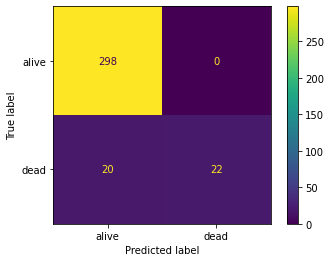

In [1516]:
forest_clf = RandomForestClassifier(n_estimators=50, max_features=15, max_depth=6, bootstrap=False)
forest_clf.fit(X_train_prepared,y_train)
plot_confusion_matrix(forest_clf, X_test_prepared, y_test, values_format='d', display_labels=['alive', 'dead'])

In [1517]:
y_train_pred = cross_val_predict(forest_clf, X_train_prepared, y_train, cv=10)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1130
           1       0.92      0.51      0.65       229

    accuracy                           0.91      1359
   macro avg       0.91      0.75      0.80      1359
weighted avg       0.91      0.91      0.90      1359



0.9018056887184404

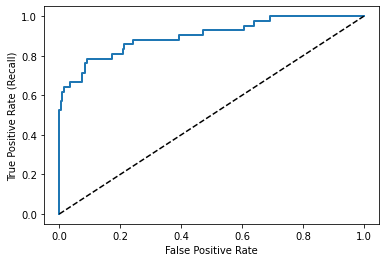

In [1520]:
y_prob = forest_clf.predict_proba(X_test_prepared)
y_prob = y_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
def plot_my_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
plot_my_roc_curve(fpr, tpr) 
roc_auc_score(y_test, y_prob)

In [1522]:
np.mean(cross_val_score(forest_clf, X_train_prepared, y_train, cv=5, scoring="roc_auc"))

0.8892202129023984

I will optimize the threshold using Youden's J Statistic

In [1521]:
J = thresholds[np.argmax(tpr-fpr)]
y_prob_adjusted = np.where(y_prob > J, 1, 0)
cm = confusion_matrix(y_test, y_prob_adjusted)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('recall = ', recall)
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('False Positive Rate = ', fpr)

recall =  0.7619047619047619
False Positive Rate =  0.09060402684563758


The optimized random forest classifier had a recall of 76.2% and false positive rate of 9.1%.  I will test other algorithms for better performance.

## Support Vector Machines (SVM)

In [1524]:
param_grid = [
    {'C': [0.01, 0.1, 0.5, 1, 10, 100, 500, 1000], 
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 
     'kernel': ['rbf']},
]

svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='roc_auc') 
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}

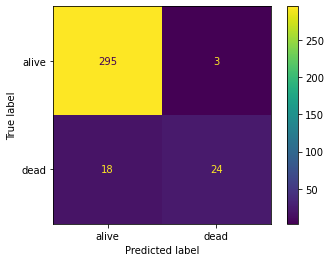

In [1525]:
svm_clf = SVC(C=500, gamma=0.0001, kernel='rbf')
svm_clf.fit(X_train_prepared,y_train)
plot_confusion_matrix(svm_clf, X_test_prepared, y_test, values_format='d', display_labels=['alive', 'dead'])

In [1526]:
y_train_pred = cross_val_predict(svm_clf, X_train_prepared, y_train, cv=10)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1130
           1       0.92      0.58      0.71       229

    accuracy                           0.92      1359
   macro avg       0.92      0.78      0.83      1359
weighted avg       0.92      0.92      0.91      1359



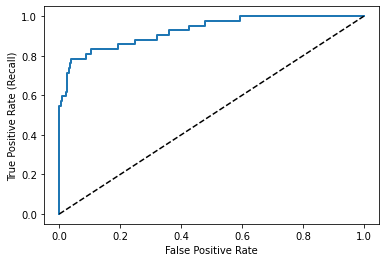

0.9275327580696708

In [1527]:
y_scores = svm_clf.decision_function(X_test_prepared)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_my_roc_curve(fpr, tpr) 
plt.show() 
roc_auc_score(y_test, y_scores)

In [1528]:
np.mean(cross_val_score(svm_clf, X_train_prepared, y_train, cv=5, scoring="roc_auc"))

0.8937061262878887

In [1529]:
J = thresholds[np.argmax(tpr-fpr)]
y_scores_adjusted = np.where(y_scores > J, 1, 0)
cm = confusion_matrix(y_test, y_scores_adjusted)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('recall = ', recall)
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('False Positive Rate = ', fpr)

recall =  0.7619047619047619
False Positive Rate =  0.03691275167785235


The optimized SVM model has a lower false positive rate for the same recall as the random forest classifier.

# Logistic Regression

In [1530]:
from sklearn.linear_model import LogisticRegression

param_grid = [
    {'C': [0.01, 0.1, 0.5, 1, 10, 100, 500, 1000],
    'class_weight': [None, 'balanced']}
]

log_clf = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_clf, param_grid, cv=5, scoring='roc_auc') 
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'C': 0.5, 'class_weight': None}

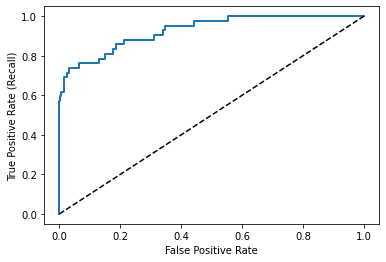

0.9282518376478108

In [1531]:
log_clf = LogisticRegression(max_iter=1000, C=0.5)
log_clf.fit(X_train_prepared,y_train)
y_scores = log_clf.decision_function(X_test_prepared)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_my_roc_curve(fpr, tpr) 
plt.show() 
roc_auc_score(y_test, y_scores)

In [1532]:
np.mean(cross_val_score(log_clf, X_train_prepared, y_train, cv=5, scoring="roc_auc"))

0.8940293275191312

In [1533]:
J = thresholds[np.argmax(tpr-fpr)]
y_scores_adjusted = np.where(y_scores > J, 1, 0)
cm = confusion_matrix(y_test, y_scores_adjusted)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('recall = ', recall)
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('False Positive Rate = ', fpr)

recall =  0.7142857142857143
False Positive Rate =  0.030201342281879196


Logistic regression has a lower false positive rate but at the cost of a lower recall.

# AdaBoost

In [1581]:
param_grid = [
    {'n_estimators': [300, 400, 500, 600], 'learning_rate': [0.01, 0.05, 0.1, 0.5]},
]

ada_clf = AdaBoostClassifier()
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='roc_auc') 
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 400}

0.9042026206455737

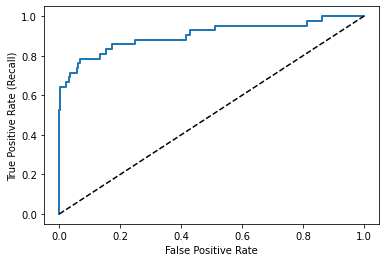

In [1589]:
ada_clf = AdaBoostClassifier(n_estimators=400, learning_rate=0.05)
ada_clf.fit(X_train_prepared, y_train)

y_prob = ada_clf.predict_proba(X_test_prepared)
y_prob = y_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plot_my_roc_curve(fpr, tpr) 
roc_auc_score(y_test, y_prob)

In [1583]:
np.mean(cross_val_score(ada_clf, X_train_prepared, y_train, cv=5, scoring="roc_auc"))

0.8963178145440555

In [1590]:
J = thresholds[np.argmax(tpr-fpr)]
y_prob_adjusted = np.where(y_prob > J, 1, 0)
cm = confusion_matrix(y_test, y_prob_adjusted)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('recall = ', recall)
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('False Positive Rate = ', fpr)

recall =  0.7619047619047619
False Positive Rate =  0.06711409395973154


The best performing model is the SVM.  However, I want to see if I can improve accuracy and interpretability by eliminating irrelant features.

# Feature Selection

I will perform backward selection to remove features that do not contribute to the SVM model prediction based on the AUC of the ROC curve to maximize the recall while minimizing the false positive rate.

In [1538]:
def PreProcess(X):
    Columns_num = []
    Columns_cat_one_hot = []
    for i in range(len(X.columns)):
        if len(Data_df[X.columns[i]].value_counts()) > 10:
            Columns_num.append(X.columns[i])
        elif len(Data_df[X.columns[i]].value_counts()) > 2:
            Columns_cat_one_hot.append(X.columns[i])
    full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), Columns_num), 
        ("cat", OneHotEncoder(), Columns_cat_one_hot),
    ])
    return full_pipeline.fit_transform(X)

X_bs = X_train
AUC_max = np.array([])
Cols_bs = np.array([])
while len(X_bs.columns) > 10:
    AUCs = np.zeros(len(X_bs.columns))
    for i in range(len(X_bs.columns)):
        X_bs_drop = X_bs.drop(columns=X_bs.columns[i])
        X_bs_drop_prepared = PreProcess(X_bs_drop)
        svm_clf = SVC(C=500, gamma=0.0001, kernel='rbf')
        y_scores = cross_val_score(svm_clf, X_bs_drop_prepared, y_train, cv=5, scoring="roc_auc")
        AUC = np.mean(y_scores)
        AUCs[i] = AUC
        
        if len(X_bs.columns) < 95:
            if AUC == AUC_max[-1]:
                break
    
    idx = np.argmax(AUCs)
    AUC_max = np.append(AUC_max, AUCs[idx])
    Cols_bs = np.append(Cols_bs, X_bs.columns[idx])
    print(len(X_bs.columns)-1, X_bs.columns[idx], AUCs[idx])
    X_bs = X_bs.drop(columns=X_bs.columns[idx])

103 NA_R_3_n 0.8949018853405155
102 GB 0.897027916720106
101 ALT_BLOOD 0.8993647129237742
100 STENOK_AN 0.9012979351032449
99 D_AD_ORIT 0.9026664101577531
98 INF_ANAM 0.9029378820914026
97 Na_BLOOD 0.9038651618143732
96 NOT_NA_2_n 0.9050489504510282
95 SEX 0.9050489504510282
94 SIM_GIPERT 0.9050489504510282
93 nr11 0.9050489504510282
92 nr01 0.9050489504510282
91 nr02 0.9050489504510282
90 nr03 0.9050489504510282
89 nr04 0.9050489504510282
88 nr07 0.9050489504510282
87 nr08 0.9050489504510282
86 np01 0.9050489504510282
85 np04 0.9050489504510282
84 np05 0.9050489504510282
83 np07 0.9050489504510282
82 np08 0.9050489504510282
81 np09 0.9050489504510282
80 np10 0.9050489504510282
79 endocr_01 0.9050489504510282
78 endocr_02 0.9050489504510282
77 endocr_03 0.9050489504510282
76 zab_leg_01 0.9050489504510282
75 zab_leg_02 0.9050489504510282
74 zab_leg_03 0.9050489504510282
73 zab_leg_04 0.9050489504510282
72 zab_leg_06 0.9050489504510282
71 O_L_POST 0.9050489504510282
70 K_SH_POST 0.905048

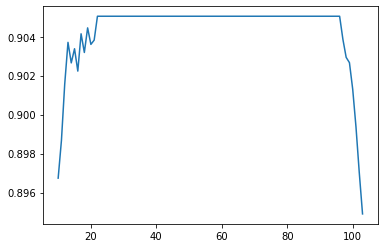

In [1539]:
Num_Features = np.linspace(103,10,num=len(AUC_max))
plt.plot(Num_Features, AUC_max)

The plot above shows that removing several features improves the AUC, and the majority of the features do not contribute to the AUC.  Only 21 features are needed to get maximal AUC!

In [1542]:
Columns_best = X_bs.columns
Columns_best = np.append(Columns_best, ['NA_R_1_n', 'R_AB_2_n', 'NOT_NA_1_n', 'K_BLOOD', 'NA_R_2_n',
                                       'AST_BLOOD', 'NOT_NA_3_n', 'S_AD_ORIT', 'FK_STENOK', 'R_AB_1_n',
                                       'lat_im', 'IBS_POST'])
Columns_best

array(['AGE', 'DLIT_AG', 'ZSN_A', 'ant_im', 'inf_im', 'post_im',
       'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_3_n', 'NA_R_1_n', 'R_AB_2_n',
       'NOT_NA_1_n', 'K_BLOOD', 'NA_R_2_n', 'AST_BLOOD', 'NOT_NA_3_n',
       'S_AD_ORIT', 'FK_STENOK', 'R_AB_1_n', 'lat_im', 'IBS_POST'],
      dtype=object)

# Predictive Features
#### Patient history
- DLIT_AG (duration of arterial hypertension in patient history): it makes sense that patients with a long history of hypertension are at greater risk of death
- ZSN_A (heart failure in patienty history): patients with a history of heart failure are more likely to die
- FK_STENOK (functional class of angina pectoris in the last year): it makes sense that patients who have experienced chest pain previously are more likely to die
- IBS_POST (coronary heart disease (CHD) in patient history): patients with a history of CHD are more likely to die

#### Presence of MI in left ventricle (ECG
- ant_im (presence of anterior MI in left ventricle according to ECG): the left ventricle is the largest chamber of the heart so it makes sense that MI in this location could predict death
- inf_im (presence of inferior MI in left ventricle according to ECG): the left ventricle is the largest chamber of the heart so it makes sense that MI in this location could predict death
- post_im (presence of posterior MI in left ventricle according to ECG): the left ventricle is the largest chamber of the heart so it makes sense that MI in this location could predict death
- lat_im (presence of lateral MI in left ventricle according to ECG): the left ventricle is the largest chamber of the heart so it makes sense that MI in this location could predict death

#### Blood work
- L_BLOOD (white blood cell count): sign of inflammation that could be elevated in patients at risk of death
- K_BLOOD (potassium levels in blood): increased potassium levels is an indicator of heart failure
- K_BLOOD (potassium levels in blood): increased potassium levels is an indicator of heart failure
- ROE (Erythrocyte sedimentation rate): another sign of inflammation that could be elevated in patients at risk of death

#### Use of opioids/NSAIDs
- TIME_B_S (time elapsed between onset of MI and getting to hospital): it makes sense that taking longer to get to the hospital might increase the risk of death
- R_AB_1_n (relapse of the pain in the first hours at hospital): patients that continue feeling pain at the hospital are more likely to die.
- R_AB_2_n (relapse of the pain in the second at hospital): patients that continue feeling pain at the hospital are more likely to die.
- R_AB_3_n (relapse of the pain on the third day): patients that continue to feel pain after multiple days at the hospital are more likely to die
- NA_R_1_n (use of opiods in first hours at hospital): patients that need more opioids initially may have a more severe MI, leading to greater risk of death
- NA_R_2_n (use of opiods in second day at hospital): patients that continue to need opioids may have a more severe MI, leading to greater risk of death
- NOT_NA_1_n (use of NSAIDs in first hours at hospital): patients that need more NSAIDs initially may have a more severe MI, leading to greater risk of death
- NOT_NA_3_n (use of NSAIDs in third day at hospital): patients that continue to need NSAIDs may have a more severe MI, leading to greater risk of death

#### Misc.
- AGE: it makes sense that older patients would be more likely to die
- S_AD_ORIT (systolic blood pressure) - a low systolic blood pressure is a strong indicator of heart failure


##### Overall, the most important risk factors for death generally appear to be:
- Presence of MI in the left ventricle according to ECG
- Patient's history of heart-related problems
- Blood work
- Opioid/NSAID use
- Age
- Blood pressure

In [1543]:
X_train_best = X_train[Columns_best]
X_test_best = X_test[Columns_best]

Columns_num = []
Columns_cat_one_hot = []
for i in range(len(X_train_best.columns)):
    if len(Data_df[X_train_best.columns[i]].value_counts()) > 10:
        Columns_num.append(X_train_best.columns[i])
    elif len(Data_df[X_train_best.columns[i]].value_counts()) > 2:
        Columns_cat_one_hot.append(X_train_best.columns[i])
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), Columns_num), 
    ("cat", OneHotEncoder(), Columns_cat_one_hot),
])

X_train_best_prepared = full_pipeline.fit_transform(X_train_best)
X_test_best_prepared = full_pipeline.transform(X_test_best)

# SVM

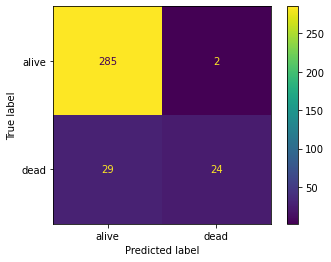

In [438]:
svm_clf = SVC()
svm_clf.fit(X_train_best_prepared, y_train)
plot_confusion_matrix(svm_clf, X_test_best_prepared, y_test, values_format='d', display_labels=['alive','dead'])

In [1544]:
param_grid = [
    {'C': [0.1, 0.5, 1, 10, 100, 500], 
     'gamma': ['scale', 1, 0.1, 0.01, 0.001], 
     'kernel': ['rbf']},
]

svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='roc_auc') 
grid_search.fit(X_train_best_prepared, y_train)
grid_search.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

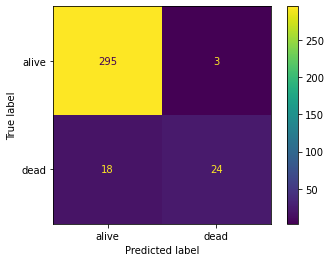

In [1548]:
svm_clf = SVC(C=500, gamma=0.0001, kernel='rbf')
svm_clf.fit(X_train_best_prepared, y_train)
plot_confusion_matrix(svm_clf, X_test_best_prepared, y_test, values_format='d', display_labels=['alive','dead'])

0.9294503036113775

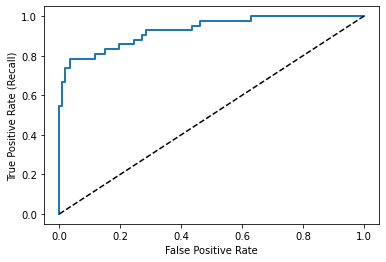

In [1549]:
y_scores = svm_clf.decision_function(X_test_best_prepared)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_my_roc_curve(fpr, tpr) 
roc_auc_score(y_test, y_scores)

In [1550]:
np.mean(cross_val_score(svm_clf, X_train_best_prepared, y_train, cv=5, scoring="roc_auc"))

0.9050489504510282

In [1551]:
J = thresholds[np.argmax(tpr-fpr)]
y_scores_adjusted = np.where(y_scores > J, 1, 0)
cm = confusion_matrix(y_test, y_scores_adjusted)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('recall = ', recall)
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('False Positive Rate = ', fpr)

recall =  0.7619047619047619
False Positive Rate =  0.03355704697986577


Following feature selection, the SVM algorithm had the same recall but a slightly lower false positive rate.  Not only did reducing the number of features improve interpretability, but it also improved predictions!

# Random Forest

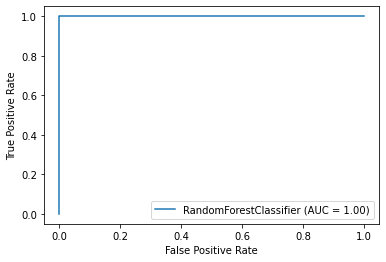

In [1273]:
from sklearn.metrics import plot_roc_curve
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_best_prepared, y_train)
plot_roc_curve(forest_clf, X_train_best_prepared, y_train)

In [1554]:
param_grid = [
    {'n_estimators': [25, 50, 75], 'max_features': [5, 10, 15], 'bootstrap': [True, False], 'max_depth': [4,5,6]}
]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='roc_auc') 
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 4, 'max_features': 10, 'n_estimators': 75}

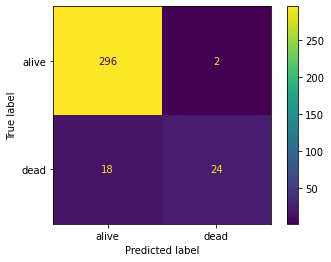

In [1561]:
forest_clf = RandomForestClassifier(n_estimators=50, max_features=15, max_depth=6, bootstrap=False)
forest_clf.fit(X_train_best_prepared, y_train)
plot_confusion_matrix(forest_clf, X_test_best_prepared, y_test, values_format='d', display_labels=['alive', 'dead'])

0.929370405880473

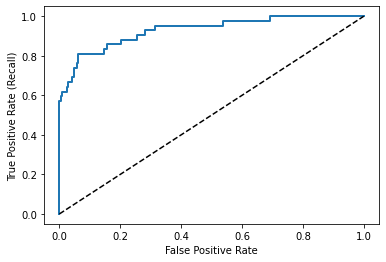

In [1562]:
y_prob = forest_clf.predict_proba(X_test_best_prepared)
y_prob = y_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plot_my_roc_curve(fpr, tpr) 
roc_auc_score(y_test, y_prob)

In [1563]:
np.mean(cross_val_score(forest_clf, X_train_best_prepared, y_train, cv=5, scoring="roc_auc"))

0.8929477149330939

In [1564]:
J = thresholds[np.argmax(tpr-fpr)]
y_prob_adjusted = np.where(y_prob > J, 1, 0)
cm = confusion_matrix(y_test, y_prob_adjusted)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('recall = ', recall)
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('False Positive Rate = ', fpr)

recall =  0.7857142857142857
False Positive Rate =  0.06040268456375839


The random forest classifier improved the recall and reduced the false positive rate compared to the random forest classifier prior to feature selection.  Depending on how many false positives the hospital can support financially, this model could be better than the SVM classifier due to the higher recall (but also higher false positive rate).

# Logistic Regression

In [1508]:
param_grid = [
    {'C': [0.01, 0.1, 0.5, 1, 10, 100, 500, 1000],
    'class_weight': [None, 'balanced']}
]

log_clf = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_clf, param_grid, cv=5, scoring='roc_auc') 
grid_search.fit(X_train_best_prepared, y_train)
grid_search.best_params_

{'C': 0.1, 'class_weight': None}

0.9336049856184084

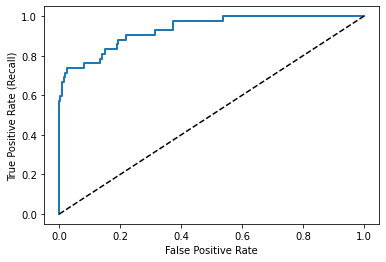

In [1566]:
log_clf = LogisticRegression(max_iter=1000, C=0.5)
log_clf.fit(X_train_best_prepared,y_train)
y_scores = log_clf.decision_function(X_test_best_prepared)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plot_my_roc_curve(fpr, tpr)  
roc_auc_score(y_test, y_scores)

In [1567]:
np.mean(cross_val_score(log_clf, X_train_best_prepared, y_train, cv=5, scoring="roc_auc"))

0.9032375700055576

In [1568]:
J = thresholds[np.argmax(tpr-fpr)]
y_scores_adjusted = np.where(y_scores > J, 1, 0)
cm = confusion_matrix(y_test, y_scores_adjusted)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('recall = ', recall)
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('False Positive Rate = ', fpr)

recall =  0.7142857142857143
False Positive Rate =  0.02348993288590604


Logistic regression has a much lower false positive rate but also lower recall so it does not perform as well as the SVM or random forest classifiers.

# Adaboost

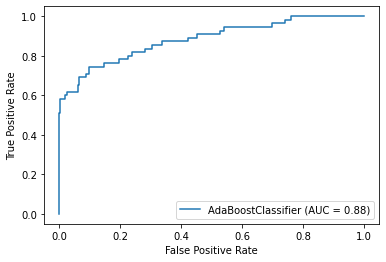

In [1044]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train_best_prepared, y_train)
plot_roc_curve(ada_clf, X_test_best_prepared, y_test)

In [1571]:
param_grid = [
    {'n_estimators': [150, 200, 250, 300, 400], 'learning_rate': [0.01, 0.05, 0.1, 0.5]},
]

ada_clf = AdaBoostClassifier()
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='roc_auc') 
grid_search.fit(X_train_best_prepared, y_train)
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 300}

0.9031639501438159

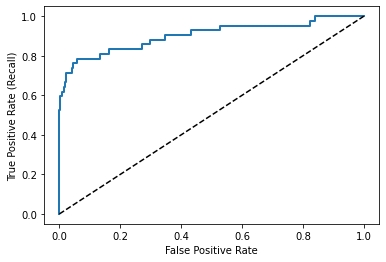

In [1591]:
ada_clf = AdaBoostClassifier(n_estimators=400, learning_rate=0.05)
ada_clf.fit(X_train_best_prepared, y_train)

y_prob = ada_clf.predict_proba(X_test_best_prepared)
y_prob = y_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plot_my_roc_curve(fpr, tpr) 
roc_auc_score(y_test, y_prob)

In [1592]:
np.mean(cross_val_score(ada_clf, X_train_best_prepared, y_train, cv=5, scoring="roc_auc"))

0.8944288401521951

In [1593]:
J = thresholds[np.argmax(tpr-fpr)]
y_prob_adjusted = np.where(y_prob > J, 1, 0)
cm = confusion_matrix(y_test, y_prob_adjusted)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print('recall = ', recall)
fpr = cm[0,1]/(cm[0,1]+cm[0,0])
print('False Positive Rate = ', fpr)

recall =  0.7619047619047619
False Positive Rate =  0.05704697986577181


The adaboost ensemble method has the same recall as the SVM classifier but higher false positive rate.  Therefore the SVM classifier (recall: 76.2%, false positive rate: 3.4%) with feature selection will be the final model for predicting death in patients following MI.
<br>
# Conclusion
I explored an interesting dataset on myocardial infarction using my medical knowledge from graduate school.  I identified methods to remove some missing data and impute other ones based on known data. I used several classification algorithms to find an optimal model with a recall of 76.2% and false positive rate of 3.4%. I used backward selection to considerably reduce the number of features without compromising accuracy.  This was extremely useful not only to make predictions but to determine the subset of features that are critical in predicting death to increase the interpretability of the model.